# Nobel prizes

## 1. Loading the data
<p><img style="float: right;margin:5px 20px 5px 1px; max-width:250px" src="https://s3.amazonaws.com/assets.datacamp.com/production/project_441/img/Nobel_Prize.png"></p>
<p>The Nobel Prize is perhaps the world's most well known scientific award. Except for the honor, prestige and substantial prize money the recipient also gets a gold medal showing Alfred Nobel (1833 - 1896) who established the prize. Every year it's given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. The first Nobel Prize was handed out in 1901, and at that time the Prize was very Eurocentric and male-focused, but nowadays it's not biased in any way whatsoever. Surely. Right?</p>
<p>Well, we're going to find out! The Nobel Foundation has made a dataset available of all prize winners from the start of the prize, in 1901, to 2016. Let's load it in and take a look.</p>

In [78]:
# Loading in required libraries: you will need pandas, seaborn and numpy
# ... YOUR CODE FOR TASK 1 ...
import numpy as np
import pandas as pd
import seaborn as sns
# Reading in the Nobel Prize data
nobel = pd.read_csv(r'C:/Users/Hloniphile\Downloads/A Visual History of Nobel Prize Winners-20200203T074203Z-001/A Visual History of Nobel Prize Winners/datasets/nobel.csv')
# Explore the data - are there missing values? How many entries do we have?
# ... YOUR CODE FOR TASK 1 ...
print(nobel.head())
print(nobel.info())

   year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  laureate_id  \
0  "in recognition of the extraordinary services ...         1/1          160   
1  "in special recognition of his poetic composit...         1/1          569   
2  "for his work on serum therapy, especially its...         1/1          293   
3                                                NaN         1/2          462   
4                                                NaN         1/2          463   

  laureate_type                     full_name  birth_date         birth_city  \
0    I

-Using pandas(pd) to read the data, the data is assigned to nobel.
-Functions (.head) and (.info) are used to get basic information from the data and to get the feel of the contents of the data.
-From function .info, it is clear that the is missing data in some of the columns and the number of entries is determined to 911.

## 2. So, who gets the Nobel Prize?
<p>Just looking at the first couple of prize winners, or Nobel laureates as they are also called, we already see a celebrity: Wilhelm Conrad Röntgen, the guy who discovered X-rays. And actually, we see that all of the winners in 1901 were guys that came from Europe. But that was back in 1901, looking at all winners in the dataset, from 1901 to 2016, which sex and which country is the most commonly represented? </p>
<p>(For <em>country</em>, we will use the <code>birth_country</code> of the winner, as the <code>organization_country</code> is <code>NaN</code> for all shared Nobel Prizes.)</p>

In [89]:
# Display the number of (possibly shared) Nobel Prizes handed
# out between 1901 and 2016
# ... YOUR CODE FOR TASK 2 ...
no_of_shared_winners = nobel[nobel['prize_share'] != '1/1'] #Using the prize share column from the data(nobel), shared winners are selected by use of value comparison to individual winners.
print(no_of_shared_winners.count())#Function count() displays the no of shared winners.

# Display the number of prizes won by male and female recipients.
# ... YOUR CODE FOR TASK 2 ...
male_winners = nobel[nobel['sex'] == 'Male'] #From sex column in the data(nobel), male enteries are selected
print('Male Winners \n')
print(male_winners.count())

print('Female Winners \n')
female_winners = nobel[nobel['sex'] == 'Female']#From sex column in the data(nobel), male enteries are selected
print(female_winners.count())

# Display the number of prizes won by the top 10 nationalities.
# ... YOUR CODE FOR TASK 2 ...
national_prizes = nobel['birth_country']#Selecting column birth country from the data(nobel), function value_counts is used to calculate total no of Nobel Prizes won by each country.
print('Top 10 countries \n')
print(national_prizes.value_counts().head(10))#Function head(10) is used display the top 10 countries with the most Nobel Prizes

year                    567
category                567
prize                   567
motivation              529
prize_share             567
laureate_id             567
laureate_type           567
full_name               567
birth_date              555
birth_city              557
birth_country           557
sex                     557
organization_name       490
organization_city       492
organization_country    493
death_date              318
death_city              307
death_country           311
dtype: int64
Male Winners 

year                    836
category                836
prize                   836
motivation              771
prize_share             836
laureate_id             836
laureate_type           836
full_name               836
birth_date              834
birth_city              834
birth_country           836
sex                     836
organization_name       647
organization_city       649
organization_country    649
death_date              567
death_city          

- Number of shared winners is 567
- Number of male winners is 836
- Number of female winners is 49

Which countries win most often?
United States of America has most wins, with a total of 259 Nobel Prizes.

## 3. USA dominance
<p>Not so surprising perhaps: the most common Nobel laureate between 1901 and 2016 was a man born in the United States of America. But in 1901 all the winners were European. When did the USA start to dominate the Nobel Prize charts?</p>
    

In [93]:
# Calculating the proportion of USA born winners per decade
nobel['usa_born_winner'] = nobel['birth_country'] == 'United States of America'#A new column is created that will display winners born in the United States of America
nobel['decade'] = (np.floor(pd.Series(nobel.year)/10)*10).astype(int)#A new column is created which displays each decade from the inception of the Nobel Prize awards
print(nobel['usa_born_winner'].head())
print('Proportions of USA born winners \n')
prop_usa_winners = nobel.groupby('decade', as_index=False)['usa_born_winner'].mean()#Using groupby function, the data is split into groups based on the columns in need for display.

# Display the proportions of USA born winners per decade
# ... YOUR CODE FOR TASK 3 ...
print(prop_usa_winners) #Display of the variable created to show the proportion of USA winners per decade

0    False
1    False
2    False
3    False
4    False
Name: usa_born_winner, dtype: bool
Proportions of USA born winners 

    decade  usa_born_winner
0     1900         0.017544
1     1910         0.075000
2     1920         0.074074
3     1930         0.250000
4     1940         0.302326
5     1950         0.291667
6     1960         0.265823
7     1970         0.317308
8     1980         0.319588
9     1990         0.403846
10    2000         0.422764
11    2010         0.292683


## 4. USA dominance, visualized
<p>A table is OK, but to <em>see</em> when the USA started to dominate the Nobel charts we need a plot!</p>

AxesSubplot(0.125,0.125;0.775x0.755)


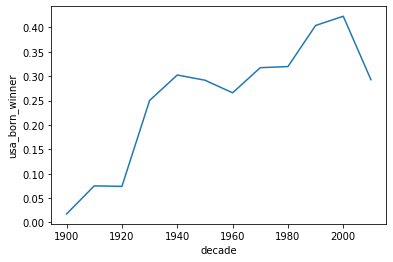

In [94]:
#using seaborn, plot the proportion of US winners by decade
Propchart = sns.lineplot(x = 'decade', y = 'usa_born_winner', data=prop_usa_winners)#Display of a line graph illustrating the relationship between the proportional relationship between US winners and the decades.
print(Propchart)

What can you conclude from the graph?
From the inception of Nobel Prize awards, there has been an steep incline in proportions of US winners per decade. However, approximately from 1910 to 1920, there proportion has remained constant as there was no increase or decrease in the proportion. From 1920 to 1930, the United States began their dominance in the Nobel Prize awards, and continued the dominance with a slight drop in 1940 for 2 decades but continued their success onwards up until 2000s, where it shows a steep decline.

## 5. What is the gender of a typical Nobel Prize winner?
<p>So the USA became the dominating winner of the Nobel Prize first in the 1930s and had kept the leading position ever since. But one group that was in the lead from the start, and never seems to let go, are <em>men</em>. Maybe it shouldn't come as a shock that there is some imbalance between how many male and female prize winners there are, but how significant is this imbalance? And is it better or worse within specific prize categories like physics, medicine, literature, etc.?</p>

0      False
1      False
2      False
3      False
4      False
       ...  
906    False
907    False
908    False
909    False
910    False
Name: female_winner, Length: 911, dtype: bool
Proportion of female winners 

    decade    category  female_winner
0     1900   Chemistry       0.000000
1     1900  Literature       0.100000
2     1900    Medicine       0.000000
3     1900       Peace       0.071429
4     1900     Physics       0.076923
..     ...         ...            ...
61    2010   Economics       0.000000
62    2010  Literature       0.285714
63    2010    Medicine       0.125000
64    2010       Peace       0.400000
65    2010     Physics       0.000000

[66 rows x 3 columns]
AxesSubplot(0.125,0.125;0.775x0.755)


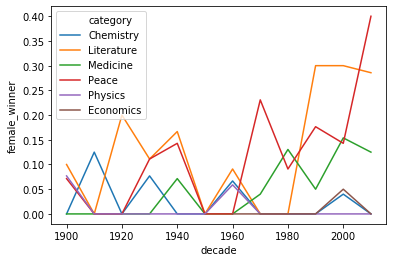

In [95]:
# Calculating the proportion of female laureates per decade
nobel['female_winner'] = nobel['sex'] == 'Female'#Selecting boolean values, of female winners
print(nobel['female_winner'].head())

print('Proportion of female winners \n')
prop_female_winners = nobel.groupby(['decade','category'], as_index=False)['female_winner'].mean()#Using groupby function, the data is split into groups based on the columns in need for display.
print(prop_female_winners)#Display of the variable created to show the proportion of female winners per decade in every category.

# Plot proportion of female winners by decade, grouped by prize category (physics, medicine, etc)
# ... YOUR CODE FOR TASK 5 ...
Prop_female_chart = sns.lineplot(x='decade',y='female_winner',hue='category',data=prop_female_winners)
print(Prop_female_chart)

```
# This is formatted as code
```

 Interpret your plot here
 

## 6. The first woman to win the Nobel Prize
<p>The plot above is a bit messy as the lines are overplotting. But it does show some interesting trends and patterns. Overall the imbalance is pretty large with physics, economics, and chemistry having the largest imbalance. Medicine has a somewhat positive trend, and since the 1990s the literature prize is also now more balanced. The big outlier is the peace prize during the 2010s, but keep in mind that this just covers the years 2010 to 2016.</p>
<p>Given this imbalance, who was the first woman to receive a Nobel Prize? And in what category?</p>


In [30]:
# Picking out the first woman to win a Nobel Prize
# ... YOUR CODE FOR TASK 6 ...
first_lady = nobel[nobel['sex'] == 'Female']
first_lady.nsmallest(1,"year")

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True


## 7. Repeat laureates
<p>For most scientists/writers/activists a Nobel Prize would be the crowning achievement of a long career. But for some people, one is just not enough, and few have gotten it more than once. Who are these lucky few? (Having won no Nobel Prize myself, I'll assume it's just about luck.)</p>

In [31]:
# Selecting the laureates that have received 2 or more prizes.
# ... YOUR CODE FOR TASK 7 ...
nobel.groupby('birth_country',as_index=False).filter(lambda group: len(group) >= 50)


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,...,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,False,1900,False
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,...,Male,NaN,NaN,NaN,1912-06-12,Paris,France,False,1900,False
16,1903,Peace,The Nobel Peace Prize 1903,NaN,1/1,466,Individual,William Randal Cremer,1828-03-18,Fareham,...,Male,NaN,NaN,NaN,1908-07-22,London,United Kingdom,False,1900,False
17,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/2,4,Individual,Antoine Henri Becquerel,1852-12-15,Paris,...,Male,École Polytechnique,Paris,France,1908-08-25,NaN,France,False,1900,False
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,5,Individual,Pierre Curie,1859-05-15,Paris,...,Male,École municipale de physique et de chimie indu...,Paris,France,1906-04-19,Paris,France,False,1900,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,2016,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for their contributions to contract theory""",1/2,935,Individual,Oliver Hart,1948-10-09,London,...,Male,Harvard University,"Cambridge, MA",United States of America,NaN,NaN,NaN,False,2010,False
905,2016,Literature,The Nobel Prize in Literature 2016,"""for having created new poetic expressions wit...",1/1,937,Individual,Bob Dylan,1941-05-24,"Duluth, MN",...,Male,NaN,NaN,NaN,NaN,NaN,NaN,True,2010,False
908,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/2,928,Individual,David J. Thouless,1934-09-21,Bearsden,...,Male,University of Washington,"Seattle, WA",United States of America,NaN,NaN,NaN,False,2010,False
909,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/4,929,Individual,F. Duncan M. Haldane,1951-09-14,London,...,Male,Princeton University,"Princeton, NJ",United States of America,NaN,NaN,NaN,False,2010,False





How many people have received 2 or more prizes?

## 8. How old are you when you get the prize?
<p>The list of repeat winners contains some illustrious names! We again meet Marie Curie, who got the prize in physics for discovering radiation and in chemistry for isolating radium and polonium. John Bardeen got it twice in physics for transistors and superconductivity, Frederick Sanger got it twice in chemistry, and Linus Carl Pauling got it first in chemistry and later in peace for his work in promoting nuclear disarmament. We also learn that organizations also get the prize as both the Red Cross and the UNHCR have gotten it twice.</p>
<p>But how old are you generally when you get the prize?</p>

In [73]:
# Converting birth_date from String to datetime
#nobeldf = pd.read_csv(r'C:/Users/Sizwe/Downloads/datasets/nobel.csv')
nobel['birth_date'] = pd.to_datetime(nobel['birth_date'])
nobel['birth_date']
# Calculating the age of Nobel Prize winners
nobel['age'] = nobel['year'] - nobel['birth_date'].dt.year
# What is the mean age of winners and it's standard devation? What is the median age?
mean = nobel['age'].mean()#Average age
print("Mean " + mean)
std = nobel['age'].std()#Standard deviation 
print('Standard deviation ' +  std)

TypeError: can only concatenate str (not "numpy.float64") to str

## 9. Age differences between prize categories


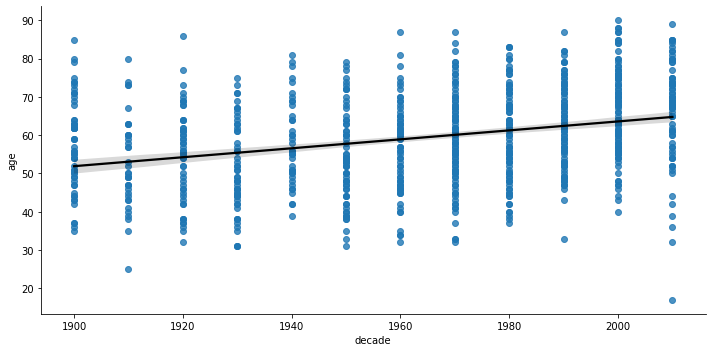

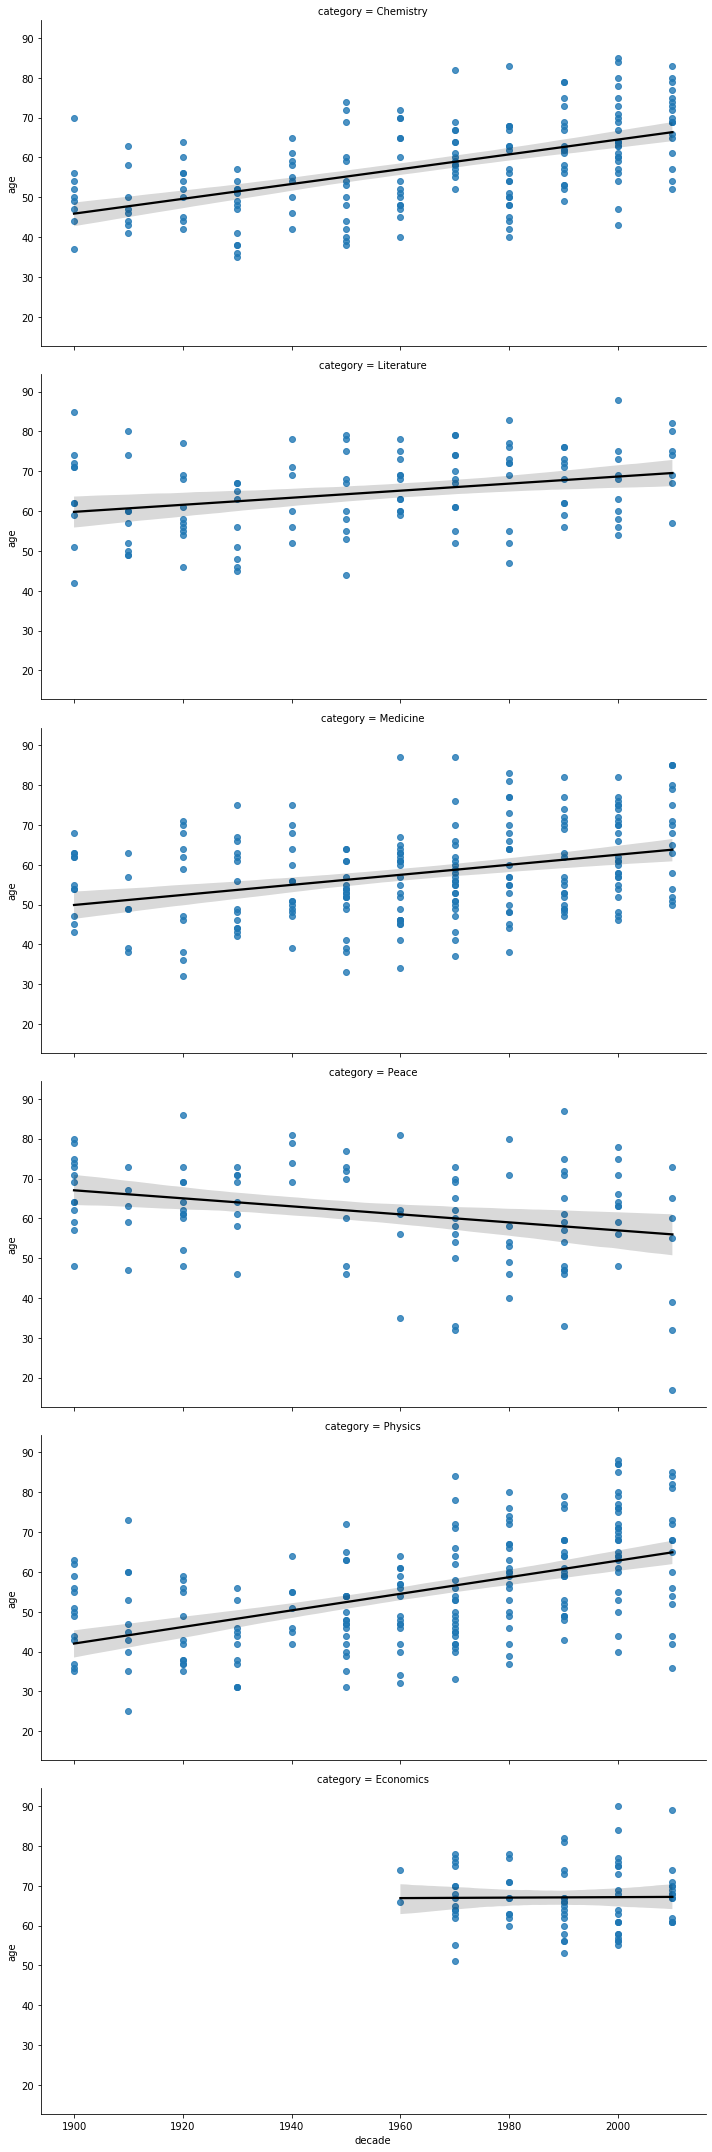

In [70]:
#Plot the age of nobel candidates by decade
#YOUR CODE FOR TASK 9 ...
age_by_decade = sns.lmplot(x='decade',y='age',data=nobel,aspect=2,line_kws={'color':'black'})
print(age_by_decade)
# Plot the age of nobel candidates by decade and prize category
age_by_prize_decade = sns.lmplot(x='decade',y='age',data=nobel,row='category',aspect=2,line_kws={'color':'black'})
print(age_by_prize_decade)

What can you conclude about the age at which people win different types of Nobel Prizes?

## 10. Oldest and youngest winners
<p>In the peace category there is a winner around 2010 that seems exceptionally young. This begs the questions, who are the oldest and youngest people ever to have won a Nobel Prize?</p>


## Congratulations! You've reached the end of the challenge!